In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from skimage import io, color
from skimage import exposure
from time import time

from keras import backend
from keras.models import Sequential
from keras import layers
from keras import metrics, optimizers, losses
from keras.layers import Dense, Dropout, Activation, Flatten, Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.layers import Conv2D, MaxPooling2D, concatenate
from keras.models import Model
from keras import backend as K
from keras.callbacks import TensorBoard

Using TensorFlow backend.


In [2]:
from keras.datasets import mnist
from keras.utils import np_utils

(x_train, y_train), (x_test, y_test) = mnist.load_data()
img_rows, img_cols = x_train.shape[1:]

In [ ]:
plt.imshow(x_train[0], cmap=plt.get_cmap('gray'))

In [3]:
# metemos una dimension más a cada imagen para darle el canal
x_train_ = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1) 
x_test_ = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)

# pasar a float
x_train_ = x_train_.astype('float32')
x_test_ = x_test_.astype('float32')

# normalizar
x_train_ /= 255
x_test_ /= 255

# One-hot encoding de los labels
nb_classes = 10
y_train = np_utils.to_categorical(y_train, nb_classes)
y_test = np_utils.to_categorical(y_test, nb_classes)

In [ ]:
input_shape

In [ ]:
# backend.clear_session()

In [ ]:
# Entrenamos red convolucional: conv, pooling y 2 densas

model = Sequential()
model.add(Conv2D(32, (3,3), padding='same', activation='elu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(10, activation='softmax')) # 10 clases
model.summary()

In [ ]:
# compile
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=[metrics.categorical_accuracy])

In [6]:
# tensorboard: hay que darle un path para los logs

pth = './logs/'
tensorboard = TensorBoard(log_dir=pth, histogram_freq=1)

# en consola nos vamos al directorio donde hemos creado la carpeta logs, metemos tensorboard --logdir logs/ 
# y copiamos la url que nos devuelve

In [ ]:
# fiteo

model.fit(x_train_, y_train, epochs=5, verbose=True, callbacks=[tensorboard], batch_size=128, validation_split=0.2)

In [3]:
# backend.clear_session()

# metemos una dimension más a cada imagen para darle el canal
x_train_ = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1) 
x_test_ = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)

# pasar a float
x_train_ = x_train_.astype('float32')
x_test_ = x_test_.astype('float32')

# normalizar
x_train_ /= 255
x_test_ /= 255

# One-hot encoding de los labels
nb_classes = 10
y_train = np_utils.to_categorical(y_train, nb_classes)
y_test = np_utils.to_categorical(y_test, nb_classes)

In [4]:
# input 
input_layer = Input(shape=(28, 28, 1)), dtype='float32')

# 3x3
layer_3x3 = Conv2D(16, (3,3), padding='same', activation='elu')(input_layer) 
layer_3x3 = MaxPooling2D(pool_size=(2,2))(layer_3x3)
layer_3x3 = Conv2D(16, (3,3), padding='same', activation='elu')(layer_3x3) 
layer_3x3 = MaxPooling2D(pool_size=(2,2))(layer_3x3)
layer_3x3 = Conv2D(16, (3,3), padding='same', activation='elu')(layer_3x3) 
layer_3x3 = MaxPooling2D(pool_size=(2,2))(layer_3x3)


# 5x5
layer_5x5 = Conv2D(16, (5,5), padding='same', activation='elu')(input_layer) 
layer_5x5 = MaxPooling2D(pool_size=(2,2))(layer_5x5)
layer_5x5 = Conv2D(16, (5,5), padding='same', activation='elu')(layer_5x5) 
layer_5x5 = MaxPooling2D(pool_size=(2,2))(layer_5x5)
layer_5x5 = Conv2D(16, (5,5), padding='same', activation='elu')(layer_5x5) 
layer_5x5 = MaxPooling2D(pool_size=(2,2))(layer_5x5)


# 7x7
layer_7x7 = Conv2D(16, (7,7), padding='same', activation='elu')(input_layer) 
layer_7x7 = MaxPooling2D(pool_size=(2,2))(layer_7x7)
layer_7x7 = Conv2D(16, (7,7), padding='same', activation='elu')(layer_7x7) 
layer_7x7 = MaxPooling2D(pool_size=(2,2))(layer_7x7)
layer_7x7 = Conv2D(16, (7,7), padding='same', activation='elu')(layer_7x7) 
layer_7x7 = MaxPooling2D(pool_size=(2,2))(layer_7x7)

# concatenate
x0_conc = concatenate([layer_3x3, layer_5x5, layer_7x7])
x0_conc = Flatten()(x0_conc)
x0_conc = Dense(16, activation='relu')(x0_conc) 
x0_conc = Dense(10, activation='softmax')(x0_conc)

# concatenate
m = Model(inputs=[input_layer], outputs=[x0_conc])

# compile
m.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=[metrics.categorical_accuracy])

# summary
m.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 28, 28, 1)    0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 28, 28, 16)   160         input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_4 (Conv2D)               (None, 28, 28, 16)   416         input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_7 (Conv2D)               (None, 28, 28, 16)   800         input_1[0][0]                    
__________________________________________________________________________________________________
max_poolin

In [7]:
m.fit([x_train_],
      [y_train],
      epochs=5,
      verbose=True,
      callbacks=[tensorboard],
      batch_size=128,
      validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/5
48000/48000 [==============================] - 86s 2ms/step - loss: 1.5545 - categorical_accuracy: 0.5915 - val_loss: 0.5019 - val_categorical_accuracy: 0.8625
Epoch 2/5
48000/48000 [==============================] - 88s 2ms/step - loss: 0.3559 - categorical_accuracy: 0.8962 - val_loss: 0.2293 - val_categorical_accuracy: 0.9343
Epoch 3/5
48000/48000 [==============================] - 88s 2ms/step - loss: 0.2169 - categorical_accuracy: 0.9352 - val_loss: 0.1742 - val_categorical_accuracy: 0.9474
Epoch 4/5
48000/48000 [==============================] - 87s 2ms/step - loss: 0.1699 - categorical_accuracy: 0.9487 - val_loss: 0.1429 - val_categorical_accuracy: 0.9573
Epoch 5/5
48000/48000 [==============================] - 87s 2ms/step - loss: 0.1405 - categorical_accuracy: 0.9566 - val_loss: 0.1289 - val_categorical_accuracy: 0.9608


In [4]:
# tensorboard: hay que darle un path para los logs

pth = './logs/'
tensorboard = TensorBoard(log_dir=pth, histogram_freq=1)

In [10]:
# conv + autoencoder

# input 
input_layer = Input(shape=(28, 28, 1), dtype='float32')

# Conv16 - Maxpool - Conv8 - Maxpool - Conv8 - Upsamplig Conv16 - Upsampling
c = Conv2D(filters=16, kernel_size=(3,3), padding='same', activation='relu')(input_layer) 
c = MaxPooling2D(pool_size=(2,2))(c)
c = Conv2D(filters=8, kernel_size=(3,3), padding='same', activation='relu')(c) 
encoded = MaxPooling2D(pool_size=(2,2))(c)

c = Conv2D(filters=8, kernel_size=(3,3), padding='same', activation='relu')(encoded) 
c = UpSampling2D(size=(2,2))(c)
c = Conv2D(filters=16, kernel_size=(3,3), padding='same', activation='relu')(c) 
c = UpSampling2D(size=(2,2))(c)
decoded = Conv2D(filters=1, kernel_size=(3,3), padding='same', activation='relu')(c)

# concatenate
autoencoder = Model(inputs=[input_layer], outputs=[decoded])

# compile
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

# summary
autoencoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 14, 14, 8)         1160      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 7, 7, 8)           584       
_________________________________________________________________
up_sampling2d_3 (UpSampling2 (None, 14, 14, 8)         0         
__________

In [11]:
autoencoder.fit(x_train_,
                x_train_,
                epochs=5,
                verbose=True,
                callbacks=[tensorboard],
                batch_size=128,
                validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/5
48000/48000 [==============================] - 97s 2ms/step - loss: 0.1543 - val_loss: 0.1298
Epoch 2/5
48000/48000 [==============================] - 97s 2ms/step - loss: 0.1230 - val_loss: 0.1151
Epoch 3/5
48000/48000 [==============================] - 98s 2ms/step - loss: 0.1156 - val_loss: 0.1113
Epoch 4/5
48000/48000 [==============================] - 96s 2ms/step - loss: 0.1101 - val_loss: 0.1068
Epoch 5/5
48000/48000 [==============================] - 97s 2ms/step - loss: 0.1061 - val_loss: 0.1063


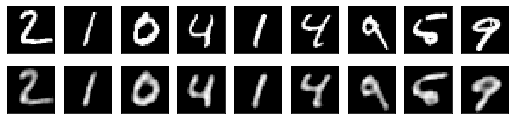

In [12]:
decoded_imgs = autoencoder.predict(x_test_)

import matplotlib.pyplot as plt
n = 10
plt.figure(figsize=(10, 2))
for i in range(1,n):
    # display original
    ax = plt.subplot(2, n, i)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [14]:
# SENTIMENT ANALISIS CON CONVOLUTIONAL NN

import pandas as pd

filepath_dict = {'yelp':'yelp_labelled.txt',
                 'amazon':'amazon_cells_labelled.txt',
                 'imdb':'imdb_labelled.txt'}

df_list = []
for source, filepath in filepath_dict.items():
    df = pd.read_csv(filepath, names=['sentence', 'label'], sep='\t')
    df['source'] = source  # Add another column filled with the source name
    df_list.append(df)

df = pd.concat(df_list)
df.head()

,sentence,label,source
0,Wow... Loved this place.,1,yelp
1,Crust is not good.,0,yelp
2,Not tasty and the texture was just nasty.,0,yelp
3,Stopped by during the late May bank holiday of...,1,yelp
4,The selection on the menu was great and so wer...,1,yelp


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

In [ ]:
from keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer(num_wrods=5000)
tokenizer.fit_on_texts(sentences_train)

x_train = tokenizer.text_to_sequences(sequences_train)
x_test = tokenizer.text_to_sequences(sequences_test)

vocagb_size = len(tokenizer.word_index) + 1


In [15]:
Tokenizer??

Object `Tokenizer` not found.
